In [1]:
import pandas as pd
from collections import defaultdict

In [2]:
nist_qrel_file = 'qrels/2023.qrels.pass.withDupes.txt'
dl_2023_queries = "dl-2023-queries.tsv"

In [3]:
queries = pd.read_csv(dl_2023_queries, sep='\t', header=None, names=['qid', 'qtext'])
queries.head()

,qid,qtext
0,2000138,How does the process of digestion and metaboli...
1,2000438,apatite definition
2,2000727,calculate salary from basic pay
3,2000882,cerebellar disease definition
4,2001010,cost comparison of funerals in australia


In [4]:
nist_qrels = pd.read_csv(nist_qrel_file, sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
queries_judged = set(nist_qrels['qid'])
real_queries_judged = [x for x in queries_judged if x < 3000000]
t5_queries_judged = [x for x in queries_judged if x > 3000000 and x < 3100000]
gpt4_queries_judged = [x for x in queries_judged if x > 3100000]

In [11]:
real_queries = queries[queries['qid'].isin(real_queries_judged)]
synthetic_queries = queries[queries['qid'].isin(t5_queries_judged + gpt4_queries_judged)]

In [39]:
def get_query_length(queries):
    qlen_to_count = defaultdict(int)

    for eachline in queries.itertuples(index=True):
        qid, qtext = eachline.qid, eachline.qtext
        qlen = len(qtext.split(" "))
        qlen_to_count[qlen] += 1 
    return qlen_to_count

In [ ]:
qlen_to_count_real = get_query_length(real_queries)
qlen_to_count_synthetic = get_query_length(synthetic_queries)

In [48]:
for qlen, qcount in qlen_to_count_real.items():
    precentage = round(qcount * 100 / sum(qlen_to_count_real.values()), 2)
    qlen_to_count_real[qlen] = precentage

In [50]:
for qlen, qcount in qlen_to_count_synthetic.items():
    precentage = round(qcount * 100 / sum(qlen_to_count_synthetic.values()), 2)
    qlen_to_count_synthetic[qlen] = precentage

In [52]:
qlen_to_count_real = sorted(qlen_to_count_real.items())
qlen_to_count_real

[(2, 5.67),
 (3, 1.43),
 (4, 17.63),
 (5, 15.97),
 (6, 24.81),
 (7, 13.83),
 (8, 8.87),
 (9, 1.38),
 (10, 1.38),
 (14, 1.39)]

In [53]:
qlen_to_count_synthetic = sorted(qlen_to_count_synthetic.items())
qlen_to_count_synthetic

[(4, 7.73),
 (5, 1.97),
 (6, 12.53),
 (7, 12.9),
 (8, 6.33),
 (9, 1.8),
 (10, 4.74),
 (11, 3.55),
 (12, 4.94),
 (13, 6.92),
 (15, 1.6)]

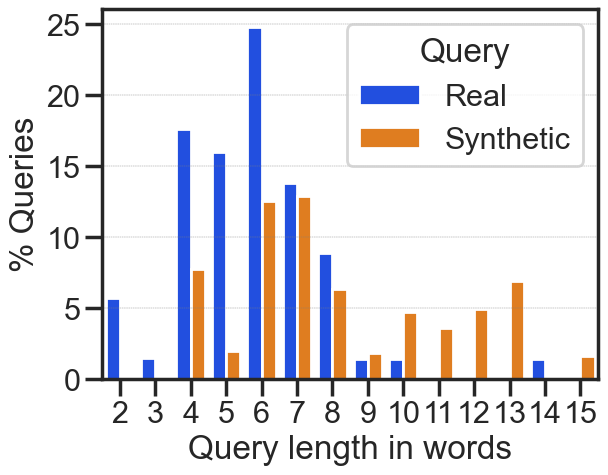

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("ticks")  # Options: white, dark, whitegrid, darkgrid, ticks
sns.set_context("poster")     # Options: paper, notebook, talk, poster
sns.set_palette("bright")   # You can also use: deep, muted, bright, dark, colorblind, or a custom list of colors

# Sample data
list1 = qlen_to_count_real
list2 = qlen_to_count_synthetic

# Convert lists to DataFrames
df1 = pd.DataFrame(list1, columns=['length', 'Real'])
df2 = pd.DataFrame(list2, columns=['length', 'Synthetic'])

# Merge the DataFrames on 'length'
df = pd.merge(df1, df2, on='length', how='outer').fillna(0)

# Convert counts to integers
df['Real'] = df['Real'].astype(float)
df['Synthetic'] = df['Synthetic'].astype(float)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='length', value_vars=['Real', 'Synthetic'], var_name='Query', value_name='count')

# Plotting
sns.barplot(x='length', y='count', hue='Query', data=df_melted)
plt.xlabel('Query length in words')
plt.ylabel('% Queries')
# plt.title('Query Length vs. Count')

# Adding dotted lines for y-values
y_values = [5, 10, 15, 20, 25]  # Example y-values for the dotted lines
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.3)

plt.savefig("figs/query_length_precentage.pdf", bbox_inches="tight")

In [6]:
def get_token_count(queries):
    qtoken_to_count = defaultdict(int)

    for qtext in list(queries['qtext']):
        qtokens = qtext.split(" ")
        for qtoken in qtokens:
            qtoken_to_count[qtoken] += 1 
    return qtoken_to_count

In [7]:
qtoken_to_count_real = get_token_count(real_queries)
qtoken_to_count_synthetic = get_token_count(synthetic_queries)

In [ ]:
# Word Count % [Rank]
for rank, eachelement in enumerate(sorted(qtoken_to_count_real.items(), key=lambda item: item[1], reverse=True)[0:10]):
    word = eachelement[0]
    count = eachelement[1]
    percentage = round(count * 100 / sum(qtoken_to_count_real.values()), 2)
    print(f"{word} & {count} & {percentage}\% & [{rank+1}] & ")

In [ ]:
# qtoken_to_count_synthetic

In [ ]:
# Word Count % [Rank]
for rank, eachelement in enumerate(sorted(qtoken_to_count_synthetic.items(), key=lambda item: item[1], reverse=True)[0:30]):
    word = eachelement[0]
    count = eachelement[1]
    percentage = round(count * 100 / sum(qtoken_to_count_synthetic.values()), 2)
    print(word)
    print(f" {count} & {percentage}\% & [{rank+1}] \\\\")